In [1]:
import numpy as np
import matplotlib.pyplot as plt

import psychometric
from quest_plus import reformat_params, QuestPlus

%matplotlib inline

In [30]:
def plot_csf(stim_space, params):
	probs = psychometric.csf_watson_and_ahumada(stim_space, true_params)
	probs = probs.reshape(len(frequencies), len(contrasts))
	extents = [
		min(frequencies), max(frequencies),
		min(contrasts), max(contrasts),
	]

	plt.imshow(probs.T, origin='lower', extent=extents, aspect='auto')
	plt.ylabel('Contrast (dB)')
	plt.xlabel('Frequency')


def simulate_from_csf(stim, params):
    stim = np.atleast_2d(stim)
    prob = psychometric.csf_watson_and_ahumada(stim, params)[0]
    rnd = np.random.rand()
    return int(rnd < prob)


def plot_posterior(posterior):
    fig, ax = plt.subplots(ncols=5)
    idxs = np.arange(0, 10, 2)
    for idx, slc in enumerate(idxs):
        ax[idx].imshow(posterior[:, :, slc])
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])
    return fig

In [7]:
frequencies = np.arange(0, 40, 2)
contrasts = np.arange(-50, 0, 3)
stim_space = reformat_params([frequencies, contrasts])

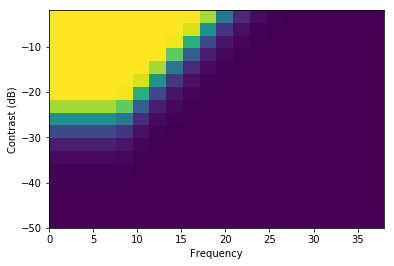

In [39]:
true_params = [-25, -40, 2]
plot_csf(stim_space, true_params)

In [40]:
t = np.arange(-40, 0, 4)
c0 = np.arange(-50, 0, 5)
cf = np.arange(1, 40, 4)

qp = QuestPlus([frequencies, contrasts], [t, c0, cf],
               function=psychometric.csf_watson_and_ahumada)

In [41]:
this_stim = qp.next_contrast()
resp = simulate_from_csf(this_stim, true_params)
print(this_stim, resp)

[ 2 -2] 1


In [42]:
qp.update(this_stim, resp)

In [43]:
posterior = qp.get_posterior()
posterior.shape

(10, 10, 10)

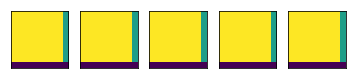

In [44]:
plot_posterior(posterior);

In [45]:
for _ in range(15):
    this_stim = qp.next_contrast()
    resp = simulate_from_csf(this_stim, true_params)
    qp.update(this_stim, resp)

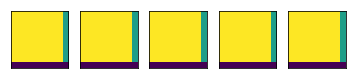

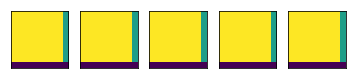

In [46]:
posterior = qp.get_posterior()
plot_posterior(posterior)

In [47]:
this_stim

array([ 2, -2])

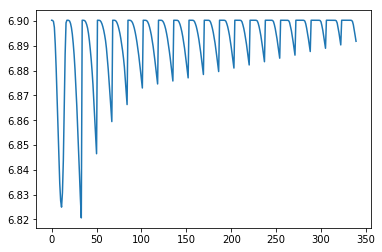

In [48]:
plt.plot(qp.entropy)

In [49]:
found_params = qp.get_fit_params()
print(found_params)

[-40 -50   1]
